In [3]:
import numpy as np
from CMO_A1 import f1, f2, f4, f3

In [4]:
def isConvex(f,a,b):
  N=1000
  k=(b-a)/N
  for i in range(0,N+1):
    if f(20522,a+k*i)+f(20522,a+(k)*(i+1))<2*f(20522,a+(k)*(i+0.5)):
      return False
  return True

isConvex(f2,-2,2)
isConvex(f1,-2,2)

True

In [7]:
def inCoercive(f):
  #first interpolate into a quartic polynomial
  x = np.linspace(-10,10,5)
  y = f(20522,x)
  p = np.polyfit(x,y,4)
  if p[0]>0:
    return True
  return False

def FindStationaryPoints(f):
  x = np.linspace(-10,10,5)
  y = f(20522,x)
  coefficients = np.polyfit(x,y,4)  # Replace with your polynomial coefficients

  # Create a polynomial object using numpy
  p = np.poly1d(coefficients)
  roots = np.roots(coefficients)

  # Find the first and second derivatives of the polynomial
  p_derivative = p.deriv()  # First derivative (cubic)
  p_second_derivative = p_derivative.deriv()  # Second derivative (quadratic)

  # Find the stationary points (roots of the first derivative)
  stationary_points = np.roots(p_derivative)

  # Evaluate the polynomial and its second derivative at the stationary points
  stationary_values = p(stationary_points)
  second_derivative_values = p_second_derivative(stationary_points)

  # Categorize stationary points as Minima or Local Maxima
  minima = []
  local_maxima = []

  for x, y, ddy in zip(stationary_points, stationary_values, second_derivative_values):
      if ddy > 0:  # Positive second derivative indicates a local minimum
          minima.append((x, y))
      elif ddy < 0:  # Negative second derivative indicates a local maximum
          local_maxima.append((x, y))

  # Create the result dictionary
  result = {
      "Roots": roots,
      "Minima": minima,
      "LocalMaxima": local_maxima
  }
  return result

Number of iterations required: 21

Iteration | Interval [a, b] | f(a), f(b) | Length | Ratio
        1 | [1.000000, 3.000000] | (0.000000, 0.000000) | 2.000000 |    N/A
        2 | [1.763932, 3.000000] | (-6.269324, 0.000000) | 1.236068 | 0.6180339887498947
        3 | [1.763932, 2.527864] | (-6.269324, -8.256555) | 0.763932 | 0.6180339887498952
        4 | [2.055728, 2.527864] | (-8.311581, -8.256555) | 0.472136 | 0.6180339887498948
        5 | [2.236068, 2.527864] | (-8.944272, -8.256555) | 0.291796 | 0.6180339887498949
        6 | [2.236068, 2.416408] | (-8.944272, -8.821393) | 0.180340 | 0.6180339887498946
        7 | [2.236068, 2.347524] | (-8.944272, -8.973318) | 0.111456 | 0.6180339887498955
        8 | [2.278640, 2.347524] | (-8.992528, -8.973318) | 0.068884 | 0.6180339887498997
        9 | [2.278640, 2.321213] | (-8.992528, -8.995536) | 0.042572 | 0.6180339887498926
       10 | [2.294902, 2.321213] | (-8.999198, -8.995536) | 0.026311 | 0.6180339887499007
       11 | [2.294902,

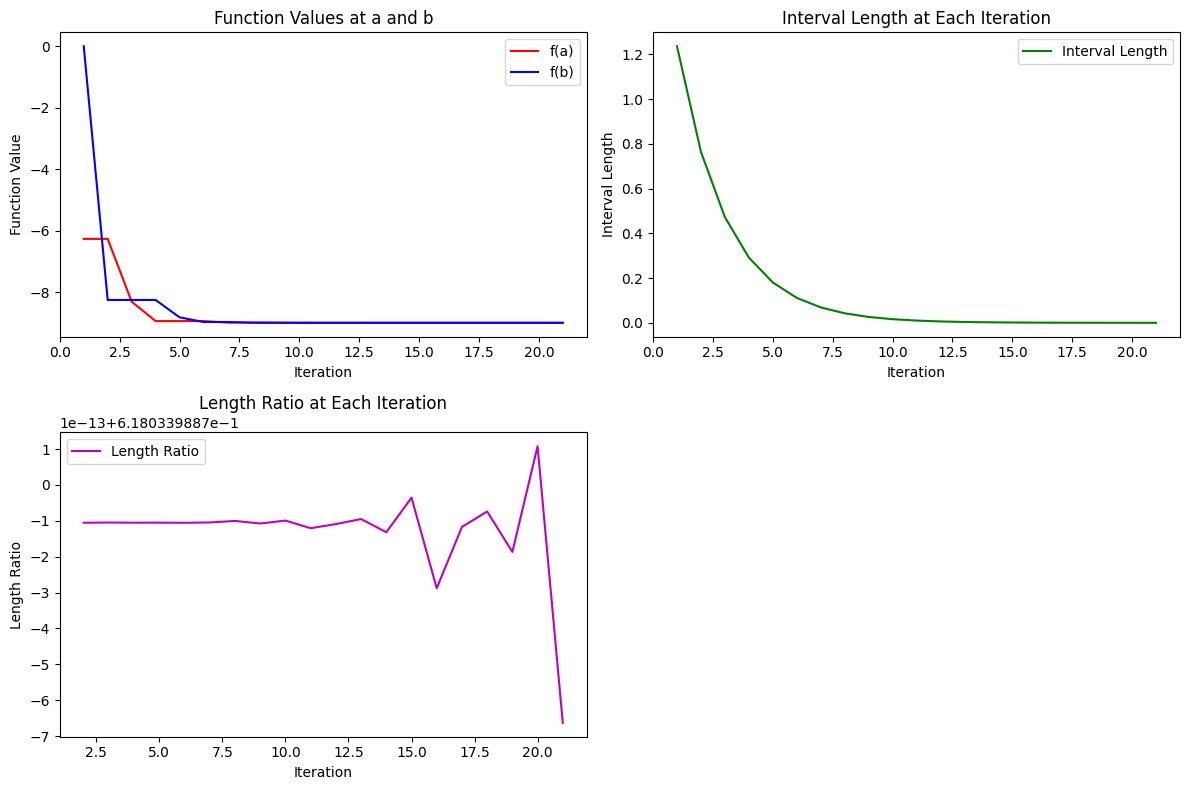

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return x * (x - 1) * (x - 3) * (x + 2)

# Golden Section Search parameters
phi = (1 + np.sqrt(5)) / 2  # Golden ratio
rho = phi - 1
tol = 10**(-4)
a, b = 1, 3  # Initial interval
iter = 0  # Count the number of iterations

# Plotting
intervals = [(a, b)]
function_values = [(f(a), f(b))]
interval_lengths = [b - a]
length_ratios = []

# Golden Section Search
while (b - a) > tol:
    x1 = rho * a + (1 - rho) * b
    x2 = (1 - rho) * a + rho * b
    f_x1 = f(x1)
    f_x2 = f(x2)

    # Update the interval based on function evaluations
    if f_x1 <= f_x2:
        b = x2  # Change to [a, x1, x2, b]
    else:
        a = x1  # Change to [x1, x2, x3, b]

    # Update the lists for tracking
    intervals.append((a, b))
    function_values.append((f(a), f(b)))
    interval_lengths.append(b - a)

    # Calculate the interval length ratio if not the first iteration
    if iter > 0:
        length_ratios.append(interval_lengths[-1] / interval_lengths[-2])

    # Increase the iteration count
    iter += 1

print(f"Number of iterations required: {iter}")

# Tabulate the intervals at each iteration
print("\nIteration | Interval [a, b] | f(a), f(b) | Length | Ratio")
for i, (interval, f_vals, length, ratio) in enumerate(zip(intervals, function_values, interval_lengths, [None] + length_ratios)):
# Corrected print statement to handle None values for ratio
  print(f"{i + 1:9d} | [{interval[0]:.6f}, {interval[1]:.6f}] | ({f_vals[0]:.6f}, {f_vals[1]:.6f}) | {length:.6f} | {ratio if ratio is not None else 'N/A':>6}")

# Plotting the values
iter_range = range(1, iter + 1)
plt.figure(figsize=(12, 8))

# Plot f(a) and f(b)
plt.subplot(2, 2, 1)
plt.plot(iter_range, [f[0] for f in function_values[1:]], 'r-', label='f(a)')
plt.plot(iter_range, [f[1] for f in function_values[1:]], 'b-', label='f(b)')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Function Values at a and b')
plt.legend()

# Plot interval lengths
plt.subplot(2, 2, 2)
plt.plot(iter_range, interval_lengths[1:], 'g-', label='Interval Length')
plt.xlabel('Iteration')
plt.ylabel('Interval Length')
plt.title('Interval Length at Each Iteration')
plt.legend()

# Plot length ratios
plt.subplot(2, 2, 3)
plt.plot(iter_range[1:], length_ratios, 'm-', label='Length Ratio')
plt.xlabel('Iteration')
plt.ylabel('Length Ratio')
plt.title('Length Ratio at Each Iteration')
plt.legend()

plt.tight_layout()
plt.show()


Number of iterations required: 21

Iteration | Interval [a, b] | f(a), f(b) | Length | Ratio
        1 | [1.000000, 3.000000] | (0.000000, 0.000000) | 2.000000 |    N/A
        2 | [1.763932, 3.000000] | (-6.269324, 0.000000) | 1.236068 | 0.618033990175597
        3 | [1.763932, 2.527864] | (-6.269324, -8.256555) | 0.763932 | 0.6180339850173581
        4 | [2.055728, 2.527864] | (-8.311581, -8.256555) | 0.472136 | 0.6180339985218026
        5 | [2.236068, 2.527864] | (-8.944272, -8.256555) | 0.291796 | 0.618033963166707
        6 | [2.236068, 2.416408] | (-8.944272, -8.821393) | 0.180340 | 0.6180340557275528
        7 | [2.236068, 2.347524] | (-8.944272, -8.973318) | 0.111456 | 0.6180338134001249
        8 | [2.278640, 2.347524] | (-8.992528, -8.973318) | 0.068884 | 0.6180344478216828
        9 | [2.278640, 2.321213] | (-8.992528, -8.995536) | 0.042572 | 0.6180327868852433
       10 | [2.294902, 2.321213] | (-8.999198, -8.995536) | 0.026311 | 0.6180371352785214
       11 | [2.294902, 2

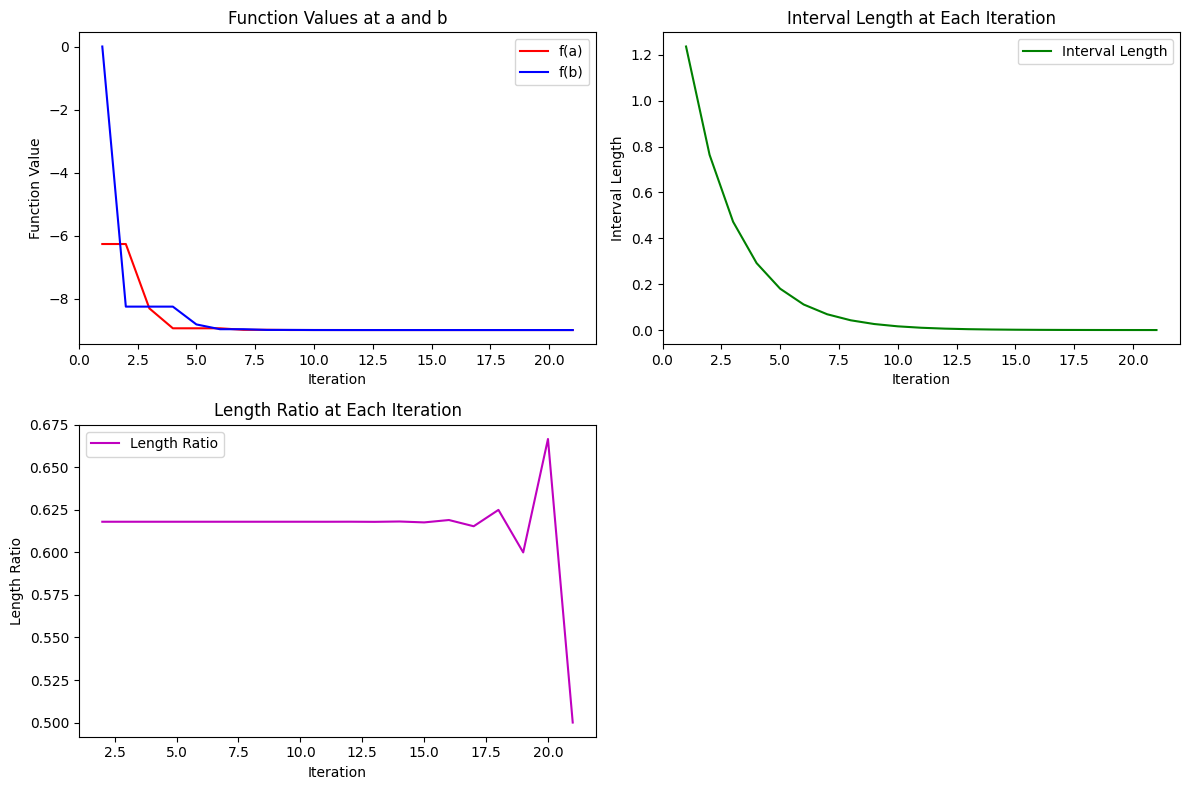

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return x * (x - 1) * (x - 3) * (x + 2)

# Fibonacci sequence generation until the required length
def generate_fibonacci(n):
    fib = [1, 1]
    while fib[-1] < n:
        fib.append(fib[-1] + fib[-2])
    return fib

# Fibonacci Search method
def fibonacci_search(a, b, tolerance):
    # Generate Fibonacci numbers until the interval is smaller than the tolerance
    n = int((b - a) / tolerance)
    fib = generate_fibonacci(n)
    k = len(fib) - 1

    # Lists to store data for plotting
    intervals = [(a, b)]
    function_values = [(f(a), f(b))]
    interval_lengths = [b - a]
    length_ratios = []

    # Initial points within the interval
    x1 = a + (fib[k - 2] / fib[k]) * (b - a)
    x2 = a + (fib[k - 1] / fib[k]) * (b - a)
    f_x1, f_x2 = f(x1), f(x2)

    iterations = 0

    # Iterate until convergence
    while k > 1:
        # Narrow the interval based on function evaluations
        if f_x1 <= f_x2:
            b = x2
            x2 = x1
            f_x2 = f_x1
            x1 = a + (fib[k - 3] / fib[k - 1]) * (b - a)
            f_x1 = f(x1)
        else:
            a = x1
            x1 = x2
            f_x1 = f_x2
            x2 = a + (fib[k - 2] / fib[k - 1]) * (b - a)
            f_x2 = f(x2)

        # Update tracking lists
        intervals.append((a, b))
        function_values.append((f(a), f(b)))
        interval_lengths.append(b - a)
        if iterations > 0:
            length_ratios.append(interval_lengths[-1] / interval_lengths[-2])

        # Move to the next Fibonacci number
        k -= 1
        iterations += 1

    return iterations, intervals, function_values, interval_lengths, length_ratios

# Define the initial interval and tolerance
a, b = 1, 3
tolerance = 1e-4

# Run the Fibonacci Search
iterations_count, intervals, function_values, interval_lengths, length_ratios = fibonacci_search(a, b, tolerance)

# Display results
print(f"Number of iterations required: {iterations_count}\n")
print("Iteration | Interval [a, b] | f(a), f(b) | Length | Ratio")
for i, (interval, f_vals, length, ratio) in enumerate(zip(intervals, function_values, interval_lengths, [None] + length_ratios)):
    print(f"{i + 1:9d} | [{interval[0]:.6f}, {interval[1]:.6f}] | ({f_vals[0]:.6f}, {f_vals[1]:.6f}) | {length:.6f} | {ratio if ratio is not None else 'N/A':>6}")

# Plotting the values
iterations_range = range(1, iterations_count + 1)
plt.figure(figsize=(12, 8))

# Plot f(a) and f(b)
plt.subplot(2, 2, 1)
plt.plot(iterations_range, [f[0] for f in function_values[1:]], 'r-', label='f(a)')
plt.plot(iterations_range, [f[1] for f in function_values[1:]], 'b-', label='f(b)')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Function Values at a and b')
plt.legend()

# Plot interval lengths
plt.subplot(2, 2, 2)
plt.plot(iterations_range, interval_lengths[1:], 'g-', label='Interval Length')
plt.xlabel('Iteration')
plt.ylabel('Interval Length')
plt.title('Interval Length at Each Iteration')
plt.legend()

# Plot length ratios
plt.subplot(2, 2, 3)
plt.plot(iterations_range[1:], length_ratios, 'm-', label='Length Ratio')
plt.xlabel('Iteration')
plt.ylabel('Length Ratio')
plt.title('Length Ratio at Each Iteration')
plt.legend()

plt.tight_layout()
plt.show()


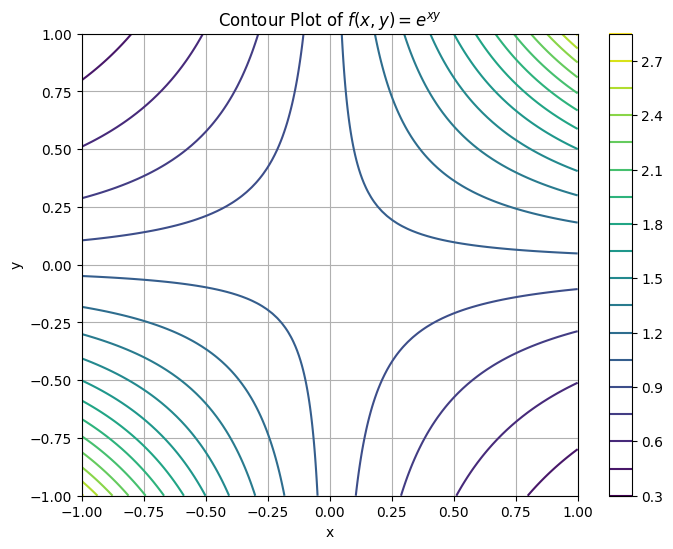

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.exp(x * y)

# Create a grid of points for x and y
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

# Evaluate the function on the grid
Z = f(X, Y)

# Create the contour plot
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour)
plt.title('Contour Plot of $f(x, y) = e^{xy}$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


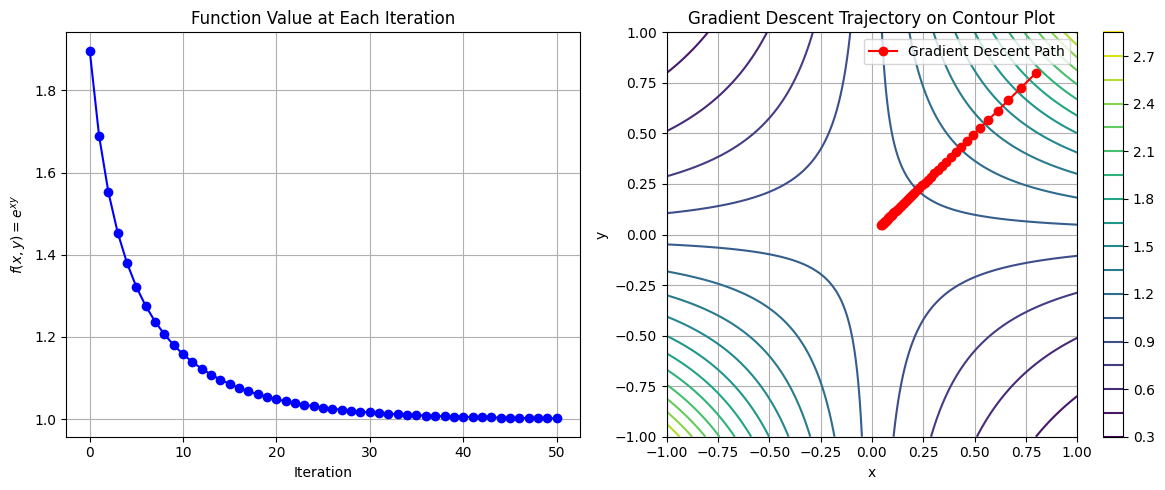

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x, y) = e^(xy)
def f(x, y):
    return np.exp(x * y)

# Define the gradient of the function
def gradient(x, y):
    df_dx = y * np.exp(x * y)  # ∂f/∂x = y * e^(xy)
    df_dy = x * np.exp(x * y)  # ∂f/∂y = x * e^(xy)
    return np.array([df_dx, df_dy])

# Gradient descent function with fixed step size
def gradient_descent(initial_point, step_size, num_iterations):
    x, y = initial_point
    points = [(x, y)]  # To store the trajectory of points
    values = [f(x, y)]  # To store the function value at each iteration

    for _ in range(num_iterations):
        grad = gradient(x, y)
        x, y = x - step_size * grad[0], y - step_size * grad[1]
        points.append((x, y))
        values.append(f(x, y))

    return points, values

# Parameters for gradient descent
initial_point = (0.8, 0.8)  # Starting point with x = y
step_size = 0.05            # Fixed step size
num_iterations = 50         # Number of iterations

# Run gradient descent
points, values = gradient_descent(initial_point, step_size, num_iterations)

# Extract x and y values for the trajectory
x_traj = [p[0] for p in points]
y_traj = [p[1] for p in points]

# Create a grid of points for contour plot
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot the function value at each iteration
plt.figure(figsize=(12, 5))

# Plotting the function value decrease
plt.subplot(1, 2, 1)
plt.plot(values, marker='o', color='blue')
plt.title('Function Value at Each Iteration')
plt.xlabel('Iteration')
plt.ylabel(r'$f(x, y) = e^{xy}$')
plt.grid(True)

# Plotting the trajectory on the contour plot
plt.subplot(1, 2, 2)
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour)
plt.plot(x_traj, y_traj, marker='o', color='red', label='Gradient Descent Path')
plt.title('Gradient Descent Trajectory on Contour Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


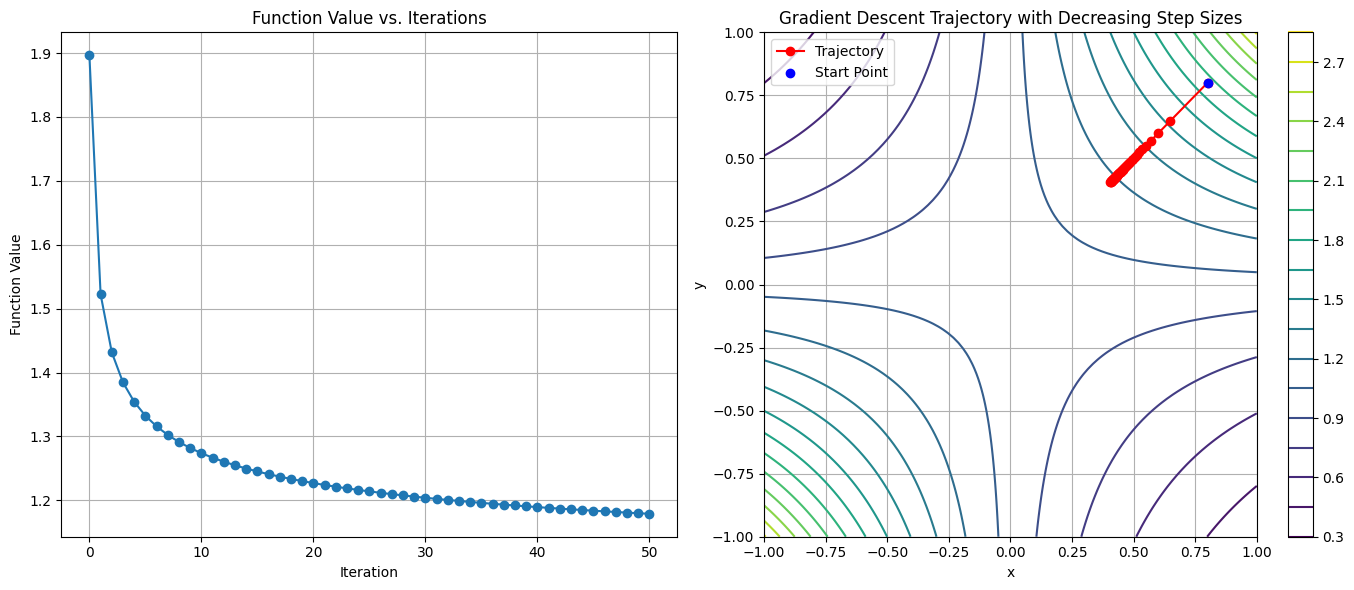

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x, y) = e^(xy)
def f(x, y):
    return np.exp(x * y)

# Define the gradient of the function
def gradient(x, y):
    df_dx = y * np.exp(x * y)
    df_dy = x * np.exp(x * y)
    return np.array([df_dx, df_dy])

# Gradient descent function with decreasing step sizes
def gradient_descent_decreasing_stepsize(starting_point, initial_learning_rate, num_iterations):
    x, y = starting_point
    points = [(x, y)]  # To store the trajectory of points
    function_values = [f(x, y)]  # To store function values at each iteration

    # Gradient descent loop with decreasing step sizes
    for t in range(num_iterations):
        learning_rate = initial_learning_rate / (t + 1)  # Decreasing step size
        grad = gradient(x, y)
        x -= learning_rate * grad[0]
        y -= learning_rate * grad[1]
        points.append((x, y))
        function_values.append(f(x, y))

    return np.array(points), function_values

# Parameters for gradient descent
starting_point = (0.8, 0.8)  # Initial point where x = y
initial_learning_rate = 0.1  # Initial step size
num_iterations = 50          # Number of iterations

# Run gradient descent with decreasing step sizes
points, function_values = gradient_descent_decreasing_stepsize(starting_point, initial_learning_rate, num_iterations)

# Create contour plot of f(x, y)
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot the function values over iterations
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(function_values, marker='o')
plt.title('Function Value vs. Iterations')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.grid(True)

# Plot the trajectory on the contour plot
plt.subplot(1, 2, 2)
plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar()
plt.plot(points[:, 0], points[:, 1], marker='o', color='red', label='Trajectory')
plt.scatter(*starting_point, color='blue', zorder=5, label='Start Point')
plt.title('Gradient Descent Trajectory with Decreasing Step Sizes')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


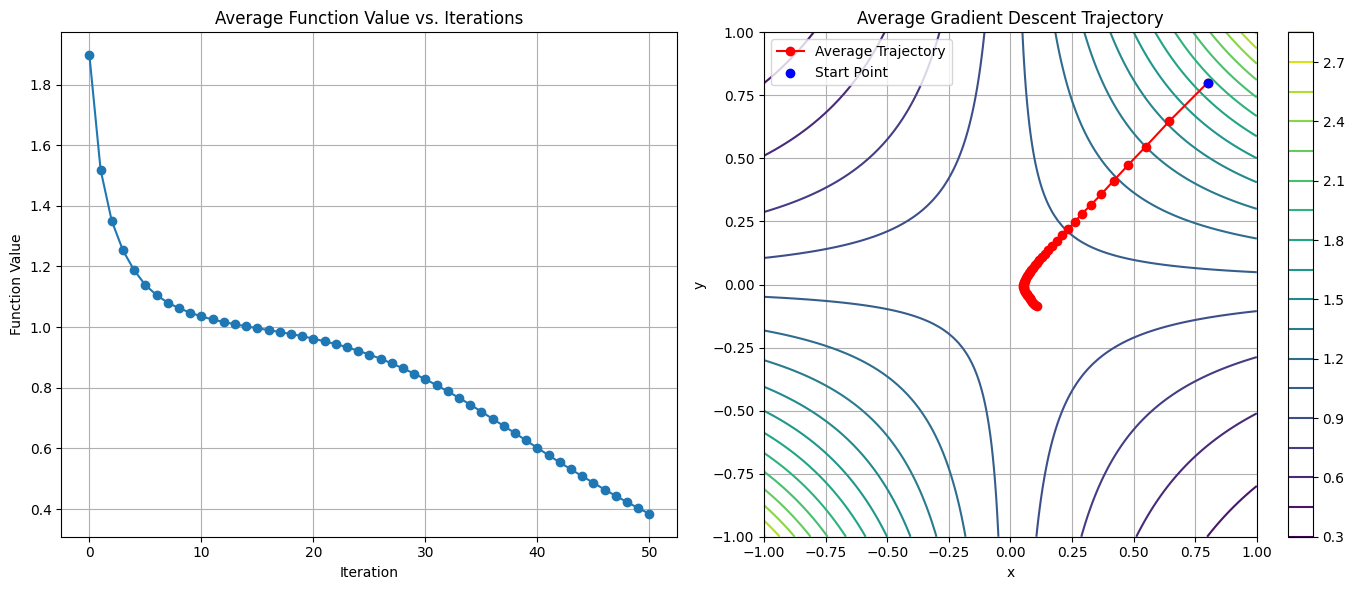

In [ ]:
#3.6
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x, y) = e^(xy)
def f(x, y):
    return np.exp(x * y)

# Define the gradient of the function
def gradient(x, y):
    df_dx = y * np.exp(x * y)
    df_dy = x * np.exp(x * y)
    return np.array([df_dx, df_dy])

# Perturbed gradient descent function with fixed step size and decreasing noise variance
def perturbed_gradient_descent_fixed_stepsize(starting_point, step_size, initial_noise_variance, num_iterations):
    x, y = starting_point
    points = [np.array([x, y])]  # To store the trajectory of points
    function_values = [f(x, y)]  # To store function values at each iteration

    # Perturbed gradient descent loop
    for t in range(num_iterations):
        noise_variance = initial_noise_variance / (t + 1)  # Decreasing noise variance
        grad = gradient(x, y)
        noise = np.random.multivariate_normal([0, 0], noise_variance * np.eye(2))
        perturbed_grad = grad + noise
        x -= step_size * perturbed_grad[0]
        y -= step_size * perturbed_grad[1]
        points.append(np.array([x, y]))
        function_values.append(f(x, y))

    return np.array(points), function_values

# Parameters
starting_point = (0.8, 0.8)  # Initial point where x = y
step_size = 0.1              # Fixed step size
initial_noise_variance = 0.1  # Initial noise variance
num_iterations = 50         # Number of iterations
num_runs = 50               # Number of runs

# Storage for all runs
all_points = []
all_function_values = []

# Perform multiple runs
for _ in range(num_runs):
    points, function_values = perturbed_gradient_descent_fixed_stepsize(starting_point, step_size, initial_noise_variance, num_iterations)
    all_points.append(points)
    all_function_values.append(function_values)

# Convert lists to numpy arrays
all_points = np.array(all_points)
all_function_values = np.array(all_function_values)

# Compute average trajectory and function values
average_points = np.mean(all_points, axis=0)
average_function_values = np.mean(all_function_values, axis=0)

# Create contour plot of f(x, y)
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot the average function values over iterations
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(average_function_values, marker='o')
plt.title('Average Function Value vs. Iterations')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.grid(True)

# Plot the average trajectory on the contour plot
plt.subplot(1, 2, 2)
plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar()
plt.plot(average_points[:, 0], average_points[:, 1], marker='o', color='red', label='Average Trajectory')
plt.scatter(*starting_point, color='blue', zorder=5, label='Start Point')
plt.title('Average Gradient Descent Trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


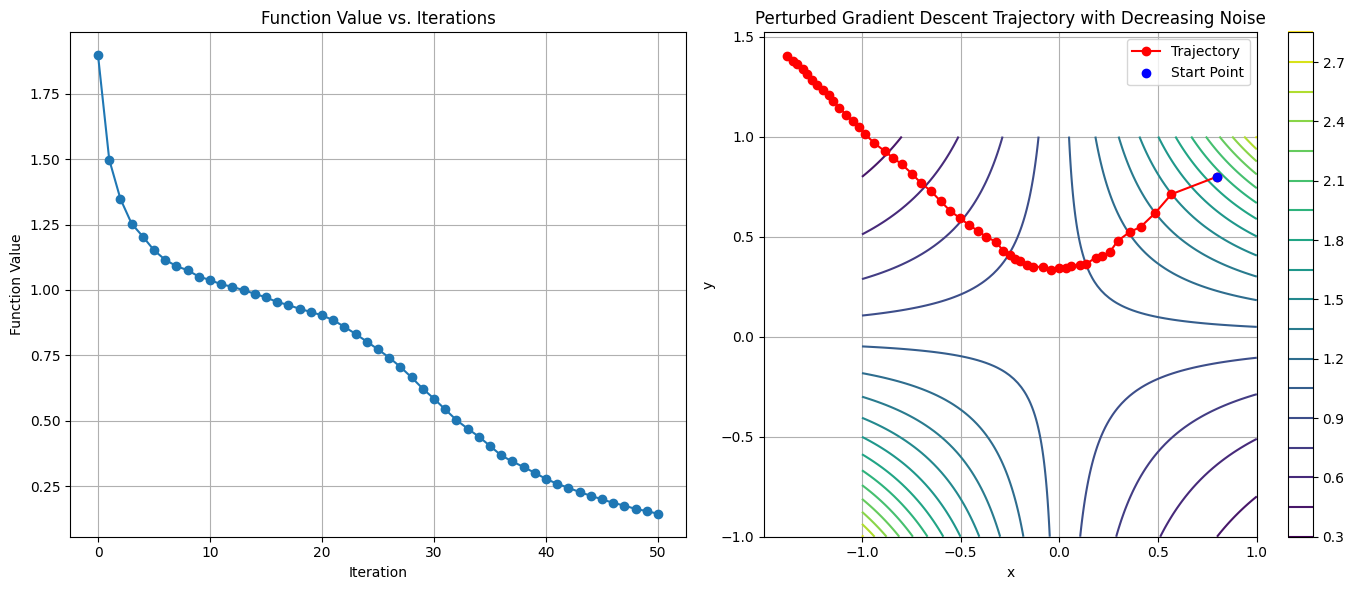

In [13]:
#3.6
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x, y) = e^(xy)
def f(x, y):
    return np.exp(x * y)

# Define the gradient of the function
def gradient(x, y):
    df_dx = y * np.exp(x * y)
    df_dy = x * np.exp(x * y)
    return np.array([df_dx, df_dy])

# Perturbed gradient descent function with decreasing noise variance
def perturbed_gradient_descent_decreasing_noise(starting_point, step_size, initial_noise_variance, num_iterations):
    x, y = starting_point
    points = [(x, y)]  # To store the trajectory of points
    function_values = [f(x, y)]  # To store function values at each iteration

    # Perturbed gradient descent loop
    for t in range(num_iterations):
        noise_variance = initial_noise_variance / (t + 1)  # Decreasing noise variance
        grad = gradient(x, y)
        noise = np.random.multivariate_normal([0, 0], noise_variance * np.eye(2))
        perturbed_grad = grad + noise
        x -= step_size * perturbed_grad[0]
        y -= step_size * perturbed_grad[1]
        points.append((x, y))
        function_values.append(f(x, y))

    return np.array(points), function_values

# Parameters for perturbed gradient descent
starting_point = (0.8, 0.8)  # Initial point where x = y
step_size = 0.1              # Fixed step size
initial_noise_variance = 0.1  # Starting noise variance
num_iterations = 50         # Number of iterations

# Run perturbed gradient descent with decreasing noise variance
points, function_values = perturbed_gradient_descent_decreasing_noise(starting_point, step_size, initial_noise_variance, num_iterations)

# Create contour plot of f(x, y)
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot the function values over iterations
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(function_values, marker='o')
plt.title('Function Value vs. Iterations')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.grid(True)

# Plot the trajectory on the contour plot
plt.subplot(1, 2, 2)
plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar()
plt.plot(points[:, 0], points[:, 1], marker='o', color='red', label='Trajectory')
plt.scatter(*starting_point, color='blue', zorder=5, label='Start Point')
plt.title('Perturbed Gradient Descent Trajectory with Decreasing Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


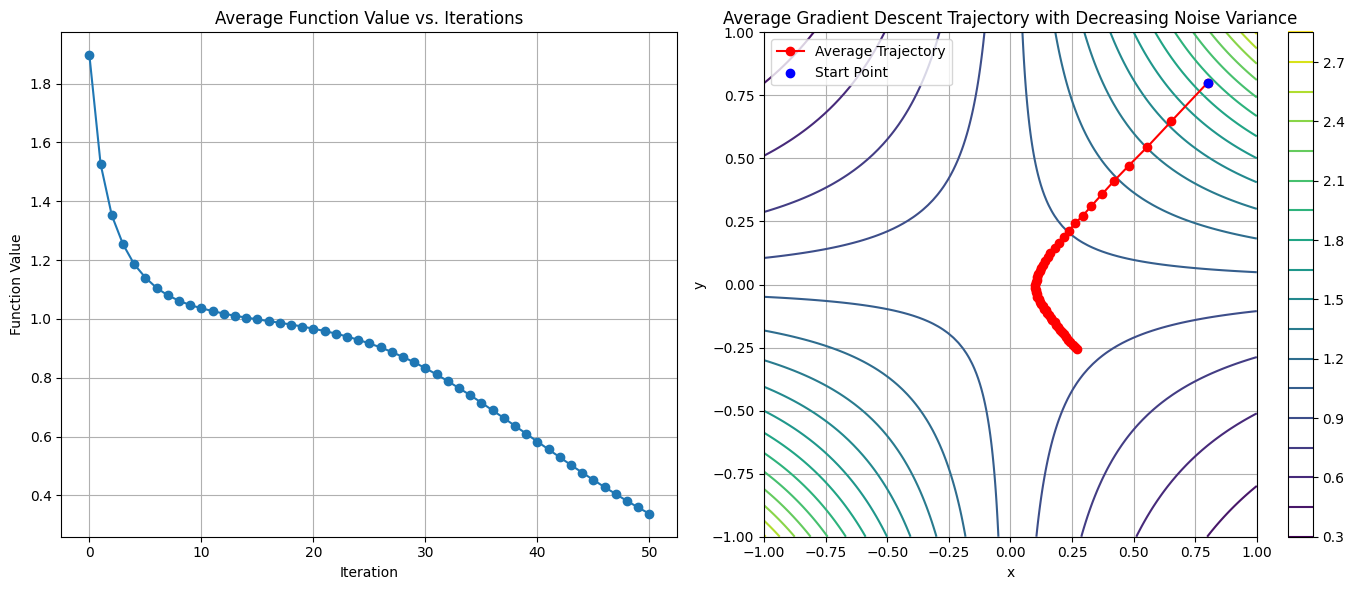

In [ ]:
#3.7
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x, y) = e^(xy)
def f(x, y):
    return np.exp(x * y)

# Define the gradient of the function
def gradient(x, y):
    df_dx = y * np.exp(x * y)
    df_dy = x * np.exp(x * y)
    return np.array([df_dx, df_dy])

# Perturbed gradient descent function with fixed step size and decreasing noise variance
def perturbed_gradient_descent_fixed_stepsize(starting_point, step_size, initial_noise_variance, num_iterations):
    x, y = starting_point
    points = [np.array([x, y])]  # To store the trajectory of points
    function_values = [f(x, y)]  # To store function values at each iteration

    # Perturbed gradient descent loop
    for t in range(num_iterations):
        noise_variance = initial_noise_variance / (t + 1)  # Decreasing noise variance
        grad = gradient(x, y)
        noise = np.random.multivariate_normal([0, 0], noise_variance * np.eye(2))
        perturbed_grad = grad + noise
        x -= step_size * perturbed_grad[0]
        y -= step_size * perturbed_grad[1]
        points.append(np.array([x, y]))
        function_values.append(f(x, y))

    return np.array(points), function_values

# Parameters for perturbed gradient descent
starting_point = (0.8, 0.8)  # Initial point where x = y
step_size = 0.1              # Fixed step size
initial_noise_variance = 0.1  # Initial noise variance
num_iterations = 50         # Number of iterations
num_runs = 50               # Number of runs

# Storage for all runs
all_points = []
all_function_values = []

# Perform multiple runs
for _ in range(num_runs):
    points, function_values = perturbed_gradient_descent_fixed_stepsize(starting_point, step_size, initial_noise_variance, num_iterations)
    all_points.append(points)
    all_function_values.append(function_values)

# Convert lists to numpy arrays
all_points = np.array(all_points)
all_function_values = np.array(all_function_values)

# Compute average trajectory and function values
average_points = np.mean(all_points, axis=0)
average_function_values = np.mean(all_function_values, axis=0)

# Create contour plot of f(x, y)
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot the average function values over iterations
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(average_function_values, marker='o')
plt.title('Average Function Value vs. Iterations')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.grid(True)

# Plot the average trajectory on the contour plot
plt.subplot(1, 2, 2)
plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar()
plt.plot(average_points[:, 0], average_points[:, 1], marker='o', color='red', label='Average Trajectory')
plt.scatter(*starting_point, color='blue', zorder=5, label='Start Point')
plt.title('Average Gradient Descent Trajectory with Decreasing Noise Variance')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



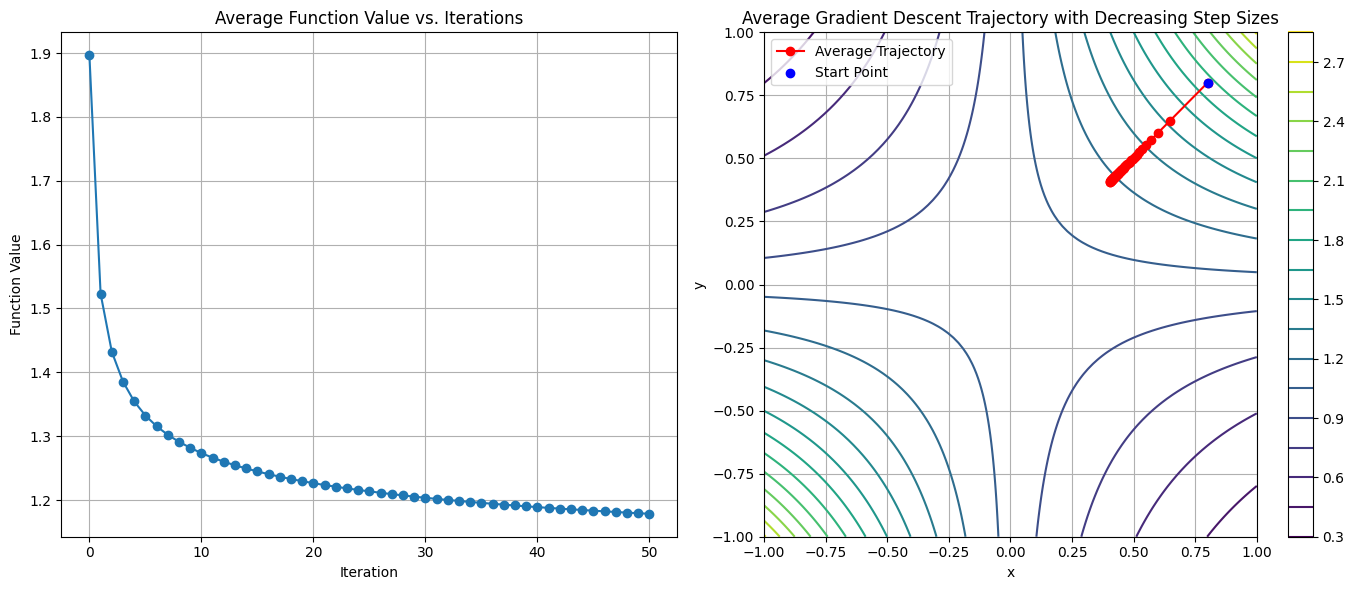

In [ ]:
#3.8
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x, y) = e^(xy)
def f(x, y):
    return np.exp(x * y)

# Define the gradient of the function
def gradient(x, y):
    df_dx = y * np.exp(x * y)
    df_dy = x * np.exp(x * y)
    return np.array([df_dx, df_dy])

# Perturbed gradient descent function with decreasing step sizes and fixed noise variance
def perturbed_gradient_descent_decreasing_stepsize(starting_point, initial_step_size, noise_variance, num_iterations):
    x, y = starting_point
    points = [np.array([x, y])]  # To store the trajectory of points
    function_values = [f(x, y)]  # To store function values at each iteration

    # Perturbed gradient descent loop
    for t in range(num_iterations):
        step_size = initial_step_size / (t + 1)  # Decreasing step size
        grad = gradient(x, y)
        noise = np.random.multivariate_normal([0, 0], noise_variance * np.eye(2))
        perturbed_grad = grad + noise
        x -= step_size * perturbed_grad[0]
        y -= step_size * perturbed_grad[1]
        points.append(np.array([x, y]))
        function_values.append(f(x, y))

    return np.array(points), function_values

# Parameters for perturbed gradient descent
starting_point = (0.8, 0.8)  # Initial point where x = y
initial_step_size = 0.1      # Initial step size
noise_variance = 0.01        # Fixed noise variance
num_iterations = 50         # Number of iterations
num_runs = 50               # Number of runs

# Storage for all runs
all_points = []
all_function_values = []

# Perform multiple runs
for _ in range(num_runs):
    points, function_values = perturbed_gradient_descent_decreasing_stepsize(starting_point, initial_step_size, noise_variance, num_iterations)
    all_points.append(points)
    all_function_values.append(function_values)

# Convert lists to numpy arrays
all_points = np.array(all_points)
all_function_values = np.array(all_function_values)

# Compute average trajectory and function values
average_points = np.mean(all_points, axis=0)
average_function_values = np.mean(all_function_values, axis=0)

# Create contour plot of f(x, y)
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot the average function values over iterations
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(average_function_values, marker='o')
plt.title('Average Function Value vs. Iterations')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.grid(True)

# Plot the average trajectory on the contour plot
plt.subplot(1, 2, 2)
plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar()
plt.plot(average_points[:, 0], average_points[:, 1], marker='o', color='red', label='Average Trajectory')
plt.scatter(*starting_point, color='blue', zorder=5, label='Start Point')
plt.title('Average Gradient Descent Trajectory with Decreasing Step Sizes')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


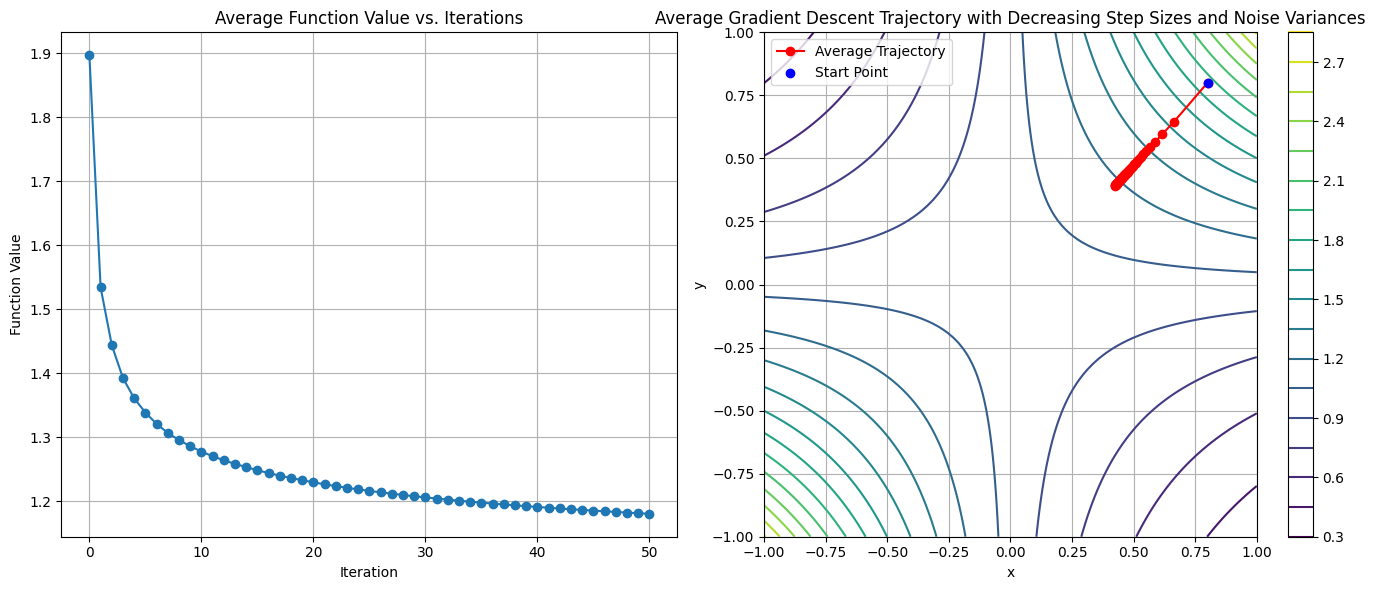

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x, y) = e^(xy)
def f(x, y):
    return np.exp(x * y)

# Define the gradient of the function
def gradient(x, y):
    df_dx = y * np.exp(x * y)
    df_dy = x * np.exp(x * y)
    return np.array([df_dx, df_dy])

# Perturbed gradient descent function with decreasing step sizes and decreasing noise variance
def perturbed_gradient_descent_decreasing(starting_point, initial_step_size, initial_noise_variance, num_iterations):
    x, y = starting_point
    points = [np.array([x, y])]  # To store the trajectory of points
    function_values = [f(x, y)]  # To store function values at each iteration

    # Perturbed gradient descent loop
    for t in range(num_iterations):
        step_size = initial_step_size / (t + 1)  # Decreasing step size
        noise_variance = initial_noise_variance / (t + 1)  # Decreasing noise variance
        grad = gradient(x, y)
        noise = np.random.multivariate_normal([0, 0], noise_variance * np.eye(2))
        perturbed_grad = grad + noise
        x -= step_size * perturbed_grad[0]
        y -= step_size * perturbed_grad[1]
        points.append(np.array([x, y]))
        function_values.append(f(x, y))

    return np.array(points), function_values

# Parameters for perturbed gradient descent
starting_point = (0.8, 0.8)  # Initial point where x = y
initial_step_size = 0.1      # Initial step size
initial_noise_variance = 0.1  # Initial noise variance
num_iterations = 50         # Number of iterations
num_runs = 50               # Number of runs

# Storage for all runs
all_points = []
all_function_values = []

# Perform multiple runs
for _ in range(num_runs):
    points, function_values = perturbed_gradient_descent_decreasing(starting_point, initial_step_size, initial_noise_variance, num_iterations)
    all_points.append(points)
    all_function_values.append(function_values)

# Convert lists to numpy arrays
all_points = np.array(all_points)
all_function_values = np.array(all_function_values)

# Compute average trajectory and function values
average_points = np.mean(all_points, axis=0)
average_function_values = np.mean(all_function_values, axis=0)

# Create contour plot of f(x, y)
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot the average function values over iterations
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(average_function_values, marker='o')
plt.title('Average Function Value vs. Iterations')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.grid(True)

# Plot the average trajectory on the contour plot
plt.subplot(1, 2, 2)
plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar()
plt.plot(average_points[:, 0], average_points[:, 1], marker='o', color='red', label='Average Trajectory')
plt.scatter(*starting_point, color='blue', zorder=5, label='Start Point')
plt.title('Average Gradient Descent Trajectory with Decreasing Step Sizes and Noise Variances')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
